In [ ]:
# it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors
# classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame df.

# In the video, Hugo discussed the importance of ensuring your data adheres to the format required by
# the scikit-learn API. The features need to be in an array where each column is a feature and each row 
# a different observation or data point - in this case, a Congressman's voting record. The target needs
# to be a single column with the same number of observations as the feature data. We have done this for
# you in this exercise. Notice we named the feature array X and response variable y: This is in accordance
# with the common scikit-learn practice.

# Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors
# parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called df.


# Create arrays X and y for the features and the target variable. Here this has been done for you. Note
# the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of
# the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame
# and Series respectively; the scikit-learn API will accept them in this form also as long as they are
# of the right shape.

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

In [ ]:
# Having fit a k-NN classifier, you can now use it to predict the label of a new data point.
# However, there is no unlabeled data available since all of it was used to fit the model!
# You can still use the .predict() method on the X that was used to fit the model, but it
# is not a good indicator of the model's ability to generalize to new, unseen data.

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

'''
<script.py> output:
    Prediction: ['democrat']
'''

dict_keys(['DESCR', 'data', 'target', 'images', 'target_names'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

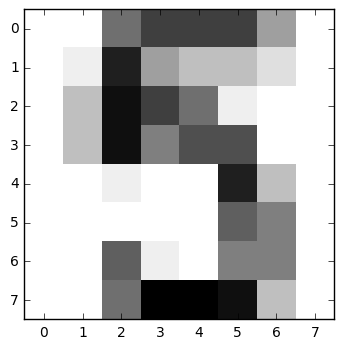

In [3]:
# Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit.
# Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black.
# Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects.
# Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data'
# and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images
# corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll
# see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data
# Visualization with Python). On the other hand, the 'data' key contains the feature array - that is,
# the images as a flattened array of 64 pixels.

# Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation,
# as in digits.images, or the [] notation, as in digits['images'].

# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.983333333333


In [5]:
# In this exercise, you will compute and plot the training and testing accuracy scores for
# a variety of different neighbor values. By observing how the accuracy scores differ for
# the training and testing sets with different values of k, you will develop your intuition
# for overfitting and underfitting.
import numpy a
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


NameError: name 'np' is not defined